## **Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.**

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [244]:
bank_data = pd.read_csv(r"C:\Users\HP\Documents\Data science\Bank Data.csv")
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


### **Dealing with missing values**

In [247]:
bank_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

age            Axes(0.125,0.53;0.133621x0.35)
balance     Axes(0.285345,0.53;0.133621x0.35)
day          Axes(0.44569,0.53;0.133621x0.35)
duration    Axes(0.606034,0.53;0.133621x0.35)
campaign    Axes(0.766379,0.53;0.133621x0.35)
pdays          Axes(0.125,0.11;0.133621x0.35)
previous    Axes(0.285345,0.11;0.133621x0.35)
dtype: object

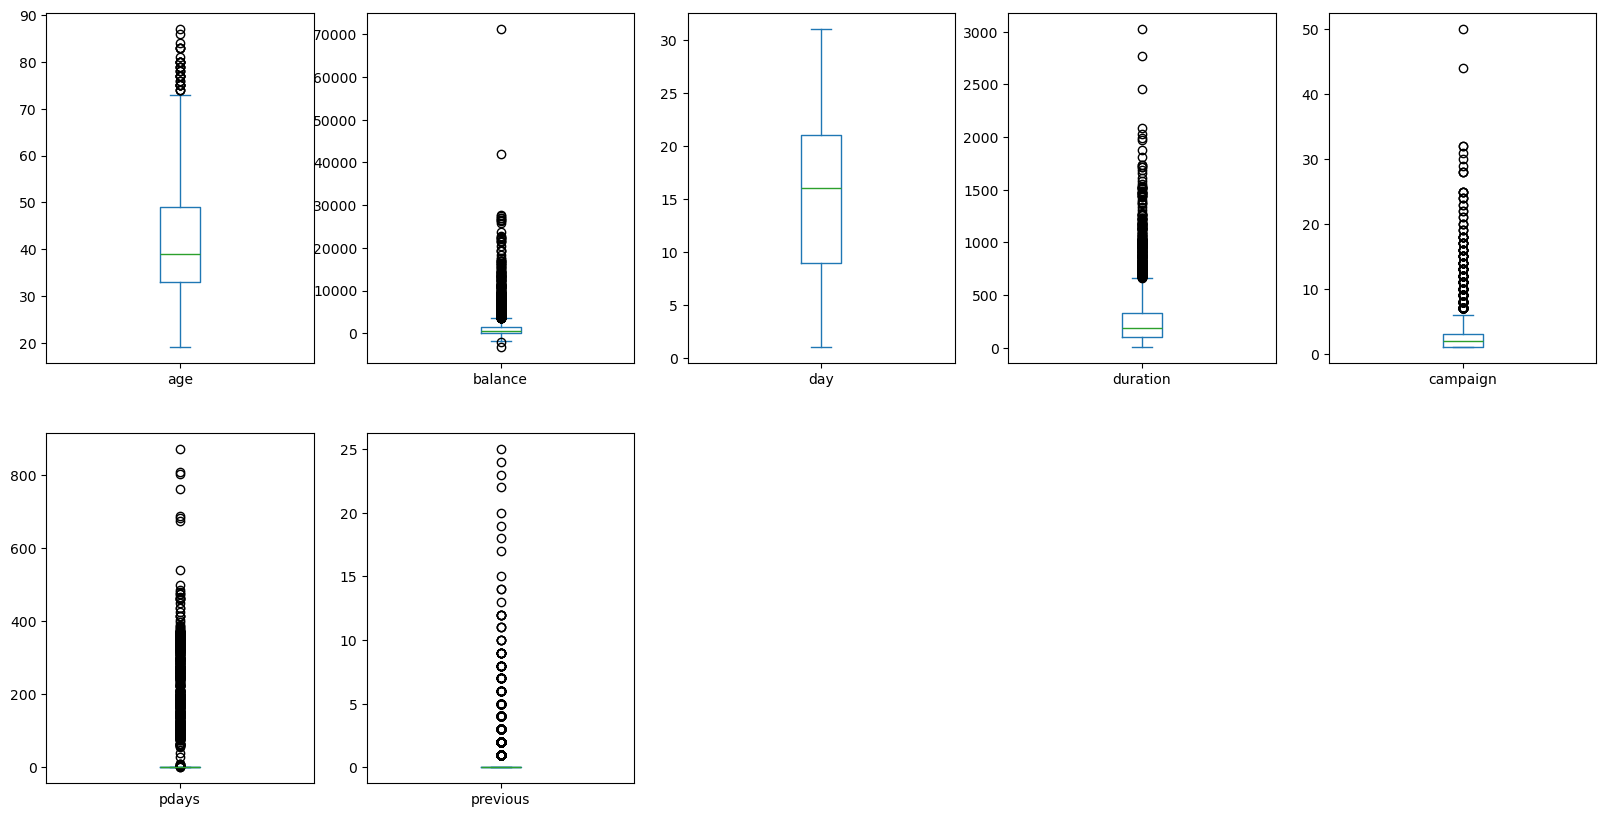

In [249]:
bank_data.plot(kind="box", subplots=True, layout=(2,5), figsize=(20,10))

In [250]:
bank_data.campaign.unique()

array([ 1,  4,  2,  5,  3,  6, 18, 10,  9,  7, 12, 14, 13, 24, 11,  8, 29,
       32, 16, 22, 15, 30, 25, 21, 17, 19, 23, 20, 50, 28, 31, 44],
      dtype=int64)

### *Convert categorical to continous variable*

In [254]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
bank_data = bank_data.apply(lb.fit_transform)


In [256]:
bank_data.sample(7)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2129,22,0,1,0,0,131,1,0,2,14,8,483,0,0,0,3,1
1620,18,1,1,0,0,894,1,0,0,13,5,363,1,0,0,3,0
4292,14,4,1,2,0,939,1,0,0,10,1,100,3,0,0,3,0
52,19,9,2,1,0,324,0,0,0,28,1,94,1,0,0,3,0
1302,27,1,1,1,0,743,1,0,2,25,8,656,0,0,0,3,0
1354,39,1,1,0,0,964,1,0,0,14,8,70,1,0,0,3,0
3762,39,9,1,1,0,2191,1,0,2,12,8,321,0,0,0,3,0


### **Split features into independent and target variables*

In [260]:
x = bank_data.drop('y', axis = 1).values
y = bank_data['y'].values

### *Spliting to train_test and scaling train sample to mean*

In [263]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [265]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [267]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

### *Importing tree model and classification report*

In [270]:
from sklearn import tree
from sklearn.metrics import classification_report as cr

### *Training*

In [312]:
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

### *Testing*

In [315]:
y_predict = tree_model.predict(x_test)
print(cr(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       807
           1       0.00      0.00      0.00        98

    accuracy                           0.89       905
   macro avg       0.45      0.50      0.47       905
weighted avg       0.79      0.89      0.84       905



In [295]:
tree_model.predict([[50, 4, 1, 1, 1, 19, 0, 0, 0, 14, 10, 59, 1, -1, 0, 2]])

array([0])